# Most used words on @realDonaldTrump's twitter

In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy

In [2]:
# load in df (originated from tweet scraper & transformed)
trumpTweets = pd.read_csv("../data/wordcloud-trump-tweets.csv")
trumpTweets.head()

,user_id_x,name,screen_name,location,description,url,protected,created_at_x,geo_enabled,verified,...,source,in_reply_to_status_id,in_reply_to_user_id,author_id,user_id_y,is_quote_status,is_retweet,lang_y,geo,coordinates
0,25073877,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,2009-03-18 13:46:38,True,True,...,Twitter for iPhone,None,None,25073877,25073877,True,False,fa,NaN,NaN
1,25073877,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,2009-03-18 13:46:38,True,True,...,Twitter for iPhone,None,None,25073877,25073877,False,False,en,NaN,NaN
2,25073877,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,2009-03-18 13:46:38,True,True,...,Twitter for iPhone,None,None,25073877,25073877,False,False,en,NaN,NaN
3,25073877,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,2009-03-18 13:46:38,True,True,...,Twitter for iPhone,None,None,25073877,25073877,True,False,en,NaN,NaN
4,25073877,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,2009-03-18 13:46:38,True,True,...,Twitter for iPhone,None,None,25073877,25073877,False,True,und,NaN,NaN


In [3]:
trumpTweets = trumpTweets.drop(columns=['user_id_x', 'geo', 'coordinates', 'created_at_x'])

## 2019 - 2020
Filter out tweets by time.
I only want to look at tweets from 2019 & 2020.

In [4]:
trumpTweets['created_at_y'] = pd.to_datetime(trumpTweets['created_at_y'])
trumpTweets19and20 = trumpTweets[trumpTweets['created_at_y'] > '2019-01-01']
trumpTweets19and20.head()

,name,screen_name,location,description,url,protected,geo_enabled,verified,lang_x,profile_background_color,...,created_at_y,text,source,in_reply_to_status_id,in_reply_to_user_id,author_id,user_id_y,is_quote_status,is_retweet,lang_y
0,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,True,True,NaN,6D5C18,...,2020-01-12 16:44:28,خطاب به رهبران ايران: معترضان خود را نكشيد. هز...,Twitter for iPhone,None,None,25073877,25073877,True,False,fa
1,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,True,True,NaN,6D5C18,...,2020-01-12 16:40:18,Why should I have the stigma of Impeachment at...,Twitter for iPhone,None,None,25073877,25073877,False,False,en
2,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,True,True,NaN,6D5C18,...,2020-01-12 16:13:56,Why did Nervous Nancy allow corrupt politician...,Twitter for iPhone,None,None,25073877,25073877,False,False,en
3,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,True,True,NaN,6D5C18,...,2020-01-12 15:30:20,Great idea. This phony Impeachment Hoax should...,Twitter for iPhone,None,None,25073877,25073877,True,False,en
4,Donald J. Trump,realDonaldTrump,"Washington, DC",45th President of the United States of America🇺🇸,https://t.co/OMxB0x7xC5,False,True,True,NaN,6D5C18,...,2020-01-12 15:26:10,https://t.co/wBcidgZ2fK,Twitter for iPhone,None,None,25073877,25073877,False,True,und


In [5]:
# isolate tweet text
tweetWords = trumpTweets19and20['text']
tweetWords.head()

0    خطاب به رهبران ايران: معترضان خود را نكشيد. هز...
1    Why should I have the stigma of Impeachment at...
2    Why did Nervous Nancy allow corrupt politician...
3    Great idea. This phony Impeachment Hoax should...
4                              https://t.co/wBcidgZ2fK
Name: text, dtype: object

In [6]:
# import and create a default dictionary to store words as it finds them from function below
from collections import defaultdict
word_counts = defaultdict(int) #template for simpler function code

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# function to run NER 
def getEntities(tweet):
    output = nlp(tweet)
    ents = output.ents
    return_list = []
    for ent in ents:
        return_list.append(ent.text.lower())
        word_counts[ent.text.lower()] += 1
    return return_list

# run on the csv
tweetWordsSpacy = tweetWords.apply(getEntities)
counts = word_counts #dict for measurements

In [7]:
#get the value from the key-value dictionary
def getSecond(x):
    return x[1]

#Get Top Entities from df and sort by most instances to least
top = 50
sorted_entities = sorted(counts.items(), key=getSecond, reverse=True)
for ent in sorted_entities[0:top]:
    print("{} - {}".format(ent[1], ent[0]))

154 - trump
138 - senate
128 - democrats
98 - house
96 - iran
86 - american
60 - u.s.
54 - americans
52 - iraq
46 - pelosi
38 - dems
38 - america
38 - today
36 - soleimani
34 - @realdonaldtrump
32 - republicans
30 - nancy pelosi
30 - the united states
30 - china
30 - democrat
28 - iranian
28 - fbi
26 - first
24 - one
24 - republican
24 - 2020
22 - the articles of impeachment
22 - 2016
20 - 🇸
18 - congress
18 - 2019
16 - constitution
16 - us
14 - tonight
14 - the impeachment hoax
14 - ukraine
12 - last night
12 - witch hunt
12 - nancy
12 - jeff van drew
10 - zero
10 - &amp
10 - usa
10 - crazy nancy
10 - thousands
10 - the republican party
10 - new york
10 - never
10 - kag2020
10 - obama


## Word Cloud

In [40]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt

In [47]:
# store words in a list for use
words = []
for ent in sorted_entities[0:top]:
    words.append(ent[0])
words

['trump',
 'senate',
 'democrats',
 'house',
 'iran',
 'american',
 'u.s.',
 'americans',
 'iraq',
 'pelosi',
 'dems',
 'america',
 'today',
 'soleimani',
 '@realdonaldtrump',
 'republicans',
 'nancy pelosi',
 'the united states',
 'china',
 'democrat',
 'iranian',
 'fbi',
 'first',
 'one',
 'republican',
 '2020',
 'the articles of impeachment',
 '2016',
 '🇸',
 'congress',
 '2019',
 'constitution',
 'us',
 'tonight',
 'the impeachment hoax',
 'ukraine',
 'last night',
 'witch hunt',
 'nancy',
 'jeff van drew',
 'zero',
 '&amp',
 'usa',
 'crazy nancy',
 'thousands',
 'the republican party',
 'new york',
 'never',
 'kag2020',
 'obama']

In [53]:
words2 = 'trump senate democrats house iran american u.s. americans iraq pelosi dems america today soleimani republicans'


In [65]:
#get image I drew of trump's face outline
# trump_mask = Image.open("../img/TrumpVector.png")
trump_mask = np.array(Image.open(requests.get("http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png", stream=True).raw))
                                        

In [66]:
def generate_wordcloud(words2, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=trump_mask).generate(words2)
    plt.figure(figsize=(10,8),facecolor = 'pink', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

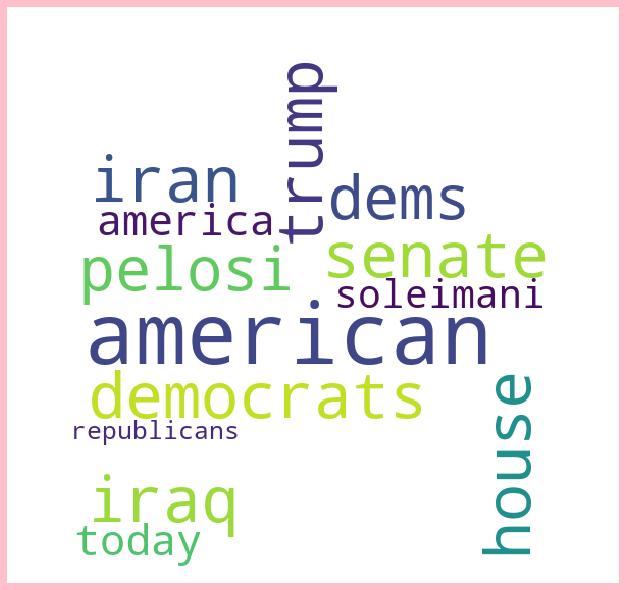

In [67]:
generate_wordcloud(words2, trump_mask)